importing nessasary libraries and datasets

In [41]:
import tensorflow as tf
import keras
import emnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

extracting the required images and downloading from EMNIST dataset

In [19]:
from emnist import extract_training_samples, extract_test_samples

# Download and extract the EMNIST dataset for numbers
emnist.extract_training_samples('digits')
emnist.extract_test_samples('digits')

# Download and extract the EMNIST dataset for letters
emnist.extract_training_samples('letters')
emnist.extract_test_samples('letters')

train_images_letters, train_labels_letters = extract_training_samples('letters')
test_images_letters, test_labels_letters = extract_test_samples('letters')

train_images_numbers, train_labels_numbers = extract_training_samples('digits')
test_images_numbers, test_labels_numbers = extract_test_samples('digits')


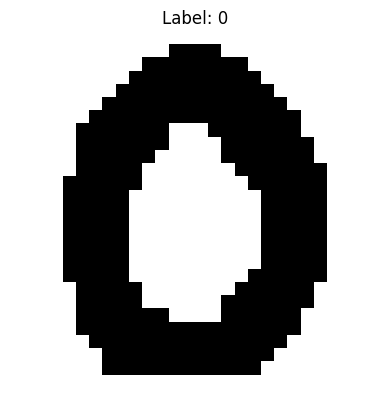

In [20]:
# Normalize the pixel values between 0 and 1
train_images_letters = np.where(train_images_letters > 0,1,0)
test_images_letters = np.where(test_images_letters > 0,1,0)

train_images_numbers = np.where(train_images_numbers > 0,1,0)
test_images_numbers = np.where(test_images_numbers > 0,1,0)


import random
i = random.randint(1,40000)

plt.imshow(train_images_numbers[i], cmap='binary')
plt.title(f"Label: {train_labels_numbers[i]}")
plt.axis('off')
plt.show()

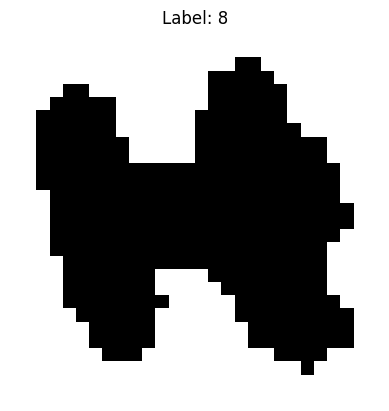

In [21]:
plt.imshow(train_images_letters[i], cmap='binary')
plt.title(f"Label: {train_labels_letters[i]}")
plt.axis('off')
plt.show()

In [28]:
# Reshape the images to (28, 28, 1)
train_images_numbers = train_images_numbers.reshape(-1, 28, 28, 1)
test_images_numbers = test_images_numbers.reshape(-1, 28, 28, 1)

train_images_letters = train_images_letters.reshape(-1, 28, 28, 1)
test_images_letters = test_images_letters.reshape(-1, 28, 28, 1)



In [30]:
# Define the input shape
input_shape = (28, 28, 1)

# Define the model architecture
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_images_numbers, train_labels_numbers, batch_size=32, epochs=5, validation_split=0.1)





Epoch 1/5
6750/6750 [==============================] - 60s 9ms/step - loss: 0.1198 - accuracy: 0.9643 - val_loss: 0.0701 - val_accuracy: 0.9785
Epoch 2/5
6750/6750 [==============================] - 57s 8ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 3/5
6750/6750 [==============================] - 57s 8ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0547 - val_accuracy: 0.9840
Epoch 4/5
6750/6750 [==============================] - 56s 8ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0537 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 [==============================] - 3s 2ms/step
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/f1/1gt4by8s091_bjbrb9wzwjtc0000gn/T/ipykernel_2035/2182815292.py", line 28, in <module>
    predictions = model.predict()
                  ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.predict() missing 1 required positional argument: 'x'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/IPython/core/inter

In [63]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_numbers, test_labels_numbers)



1250/1250 [==============================] - 4s 3ms/step - loss: 0.0544 - accuracy: 0.9836


In [144]:
new_number = Image.open('IMG_6332.jpg')
#new_number = new_number.thumbnail(28,28, resample=Image.ANTIALIAS)
new_number = new_number.convert('L')
max_dim = max(new_number.size)

# Create a new square image with black background
square_image = Image.new('1', (max_dim, max_dim), 1)

# Calculate the position to paste the original image
paste_position = ((max_dim - new_number.width) // 2, (max_dim - new_number.height) // 2)

# Paste the original image onto the square image
square_image.paste(new_number, paste_position)


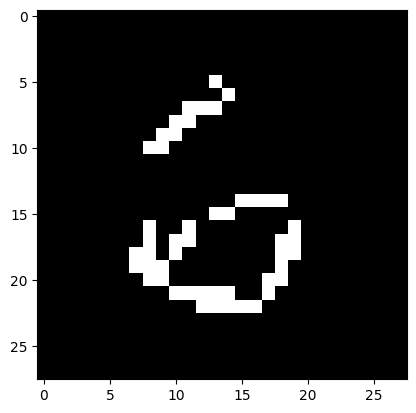

In [145]:
new_number = square_image.resize((28, 28), Image.BICUBIC)
new_number = np.array(new_number)
new_number = new_number.astype(int)
new_number = new_number.reshape(28, 28, 1)
new_number = np.expand_dims(new_number, axis=0)
#new_number = np.where(new_number < 100,0,1)

plt.imshow(new_number.squeeze(axis=0), cmap= 'binary')

In [146]:
# Make predictions using the model
predictions = model.predict(new_number)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Print the predicted class label
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 27ms/step
Predicted class: 3


In [133]:

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
